In [86]:
from datetime import datetime

In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.ensemble import RandomForestClassifier

In [88]:
import warnings
warnings.filterwarnings('ignore')

In [89]:
df = pd.read_csv("/content/PLID_Bookings_Problem1.csv")

In [90]:
dateparse = lambda x: datetime.strptime(x, '%d-%m-%Y')

In [91]:
df.head()

,Business Unit,Product Family,PLID,Fiscal Quarter,Fiscal Month,Booked_Qty,Booking_Date
0,CSWBU,CBR8,CBR-D121-DS-MOD,Q1 FY2022,AUG FY2022,204,01-08-2016
1,CSWBU,CBR8,CBR-D121-DS-MOD,Q1 FY2022,OCT FY2022,564,01-10-2016
2,CSWBU,CBR8,CBR-D121-DS-MOD,Q1 FY2022,SEP FY2022,1476,01-09-2016
3,CSWBU,CBR8,CBR-D121-DS-MOD,Q1 FY2002,AUG FY2002,374,01-08-2017
4,CSWBU,CBR8,CBR-D121-DS-MOD,Q1 FY2002,OCT FY2002,6094,01-10-2017


Parsing dates

When we work with time series data, we want to enrich the time and date component as much as possible.

We can do that by telling pandas which of our columns has dates in it using the parse_dates parameter.

In [92]:
df = pd.read_csv("/content/PLID_Bookings_Problem1.csv",
                 parse_dates=["Booking_Date"],date_parser=dateparse)

In [135]:
df.describe()

,Booked_Qty
count,10996.000000
mean,7068.159694
std,18819.530678
min,0.000000
25%,154.750000
50%,835.000000
75%,3829.500000
max,322807.000000


# Binning

XS: 0-100 products

S: 100-500 products

M: 500-1000 products

L: 1000-5000 products

XL: 5000+ products

In [93]:
C = []

In [94]:
df['Booked_Qty'][0]

204

In [95]:
for item in df['Booked_Qty']:
  if item<100:
    C.append('XS')
  elif item<500:
    C.append('S')
  elif item<1000:
    C.append('M')
  elif item<5000:
    C.append('L')
  else:
    C.append('XL')

In [96]:
df['Capacity'] = pd.Series(C)

In [97]:
df.head()

,Business Unit,Product Family,PLID,Fiscal Quarter,Fiscal Month,Booked_Qty,Booking_Date,Capacity
0,CSWBU,CBR8,CBR-D121-DS-MOD,Q1 FY2022,AUG FY2022,204,2016-08-01,S
1,CSWBU,CBR8,CBR-D121-DS-MOD,Q1 FY2022,OCT FY2022,564,2016-10-01,M
2,CSWBU,CBR8,CBR-D121-DS-MOD,Q1 FY2022,SEP FY2022,1476,2016-09-01,L
3,CSWBU,CBR8,CBR-D121-DS-MOD,Q1 FY2002,AUG FY2002,374,2017-08-01,S
4,CSWBU,CBR8,CBR-D121-DS-MOD,Q1 FY2002,OCT FY2002,6094,2017-10-01,XL


In [98]:
df.sort_values(by="Booking_Date", inplace=True)

In [99]:
df.head()

,Business Unit,Product Family,PLID,Fiscal Quarter,Fiscal Month,Booked_Qty,Booking_Date,Capacity
6249,SRSBU,A9K1000,A9K1000-ESP100,Q2 FY2013,JAN FY2013,63,2013-01-01,XS
7800,TOASTBU,SFP10G,SFP-10G-LR,Q2 FY2013,JAN FY2013,18921,2013-01-01,XL
6279,SRSBU,A9K1000,A9K1000-ESP100,Q3 FY2013,FEB FY2013,31,2013-02-01,XS
7830,TOASTBU,SFP10G,SFP-10G-LR,Q3 FY2013,FEB FY2013,12810,2013-02-01,XL
6280,SRSBU,A9K1000,A9K1000-ESP100,Q3 FY2013,MAR FY2013,61,2013-03-01,XS


## Make a copy of the original DataFrame ##

We make a copy of original dataframe so when we manipulate the copy, we still got the original

In [100]:
df_temp = df.copy()

In [136]:
df_temp.drop('Booked_Qty',axis=1,inplace=True)

##Coverting string into categories##
One way we can turn all our data into numbers is by coverting them to categories

We can check the different datatypes compatible with pandas here: https://pandas.pydata.org/pandas-docs/stable/reference/general_utility_functions.html#data-types-related-functionality

In [107]:
pd.api.types.is_string_dtype(df_temp["Business Unit"])

True

In [108]:
for label, content in df_temp.items():
  if pd.api.types.is_string_dtype(content):
    df_temp[label] = content.astype("category").cat.as_ordered()

In [109]:
df_temp.PLID.cat.codes

6249     21
7800    201
6279     21
7830    201
6280     21
       ... 
205     120
8705     57
7042    247
5405    138
7570    194
Length: 10996, dtype: int16

In [110]:
# Check missing data

df_temp.isnull().sum()/len(df_temp)

Business Unit     0.0
Product Family    0.0
PLID              0.0
Fiscal Quarter    0.0
Fiscal Month      0.0
Booked_Qty        0.0
Capacity          0.0
saleYear          0.0
saleDay           0.0
saleDayOfWeek     0.0
dtype: float64

##Turning categorical variables into number##

In [111]:
for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content) and label != 'Capacity':
        print(label)

Business Unit
Product Family
PLID
Fiscal Quarter


In [112]:
# Turn categorical variables into numbers and filling missing
for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content) and label != 'Capacity':
        # Turn categories into numbers and add +1
        df_temp[label] = pd.Categorical(content).codes  + 1

In [113]:
pd.Categorical(df_temp["Business Unit"]).codes+1

array([15, 16, 15, ..., 15,  1, 16], dtype=int8)

In [114]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10996 entries, 6249 to 7570
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Business Unit   10996 non-null  int8    
 1   Product Family  10996 non-null  int8    
 2   PLID            10996 non-null  int16   
 3   Fiscal Quarter  10996 non-null  int8    
 4   Fiscal Month    10996 non-null  int64   
 5   Booked_Qty      10996 non-null  int64   
 6   Capacity        10996 non-null  category
 7   saleYear        10996 non-null  int64   
 8   saleDay         10996 non-null  int64   
 9   saleDayOfWeek   10996 non-null  int64   
dtypes: category(1), int16(1), int64(5), int8(3)
memory usage: 580.1 KB


In [84]:
df_temp.head()

,Business Unit,Product Family,PLID,Fiscal Quarter,Fiscal Month,Booked_Qty,Capacity,saleYear,saleDay,saleDayOfWeek
6249,15,4,22,1,10,63,5,2013,1,1
7800,16,61,202,4,5,18921,4,2013,1,1
6279,15,4,22,1,10,31,5,2013,1,4
7830,16,61,202,4,5,12810,4,2013,1,4
6280,15,4,22,1,10,61,5,2013,1,4


In [129]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10996 entries, 6249 to 7570
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Business Unit   10996 non-null  int8    
 1   Product Family  10996 non-null  int8    
 2   PLID            10996 non-null  int16   
 3   Fiscal Quarter  10996 non-null  int8    
 4   Fiscal Month    10996 non-null  int64   
 5   Booked_Qty      10996 non-null  int64   
 6   Capacity        10996 non-null  category
 7   saleYear        10996 non-null  int64   
 8   saleDay         10996 non-null  int64   
 9   saleDayOfWeek   10996 non-null  int64   
dtypes: category(1), int16(1), int64(5), int8(3)
memory usage: 580.1 KB


In [137]:
y = df_temp['Capacity']
X = df_temp.drop('Capacity', axis=1)

In [142]:
clf = RandomForestClassifier()

In [143]:
X_train, X_test , y_train, y_test = X[:8212],X[8212:],y[:8212],y[8212:]

In [144]:
clf.fit(X_train,y_train)

RandomForestClassifier()

In [145]:
clf.score(X_test,y_test)

0.6102729885057471

In [29]:
df2 = pd.read_csv("/content/PLID_Bookings_Problem1.csv",
                 parse_dates=["Booking_Date"],index_col=["Booking_Date"],
                  date_parser=dateparse)

In [30]:
df2.head()

,Business Unit,Product Family,PLID,Fiscal Quarter,Fiscal Month,Booked_Qty
Booking_Date,,,,,,
2016-08-01,CSWBU,CBR8,CBR-D121-DS-MOD,Q1 FY2022,AUG FY2022,204
2016-10-01,CSWBU,CBR8,CBR-D121-DS-MOD,Q1 FY2022,OCT FY2022,564
2016-09-01,CSWBU,CBR8,CBR-D121-DS-MOD,Q1 FY2022,SEP FY2022,1476
2017-08-01,CSWBU,CBR8,CBR-D121-DS-MOD,Q1 FY2002,AUG FY2002,374
2017-10-01,CSWBU,CBR8,CBR-D121-DS-MOD,Q1 FY2002,OCT FY2002,6094


In [31]:
ts = df2[['Booked_Qty']]

In [32]:
ts.head()

,Booked_Qty
Booking_Date,
2016-08-01,204
2016-10-01,564
2016-09-01,1476
2017-08-01,374
2017-10-01,6094


In [33]:
ts.sort_index(ascending=True, inplace=True)

In [34]:
ts.head()

,Booked_Qty
Booking_Date,
2013-01-01,63
2013-01-01,18921
2013-02-01,31
2013-02-01,12810
2013-03-01,61


In [35]:
ts_1 = ts['Booked_Qty'].resample('MS').sum()

In [36]:
ts_1

Booking_Date
2013-01-01      18984
2013-02-01      12841
2013-03-01      14130
2013-04-01      36287
2013-05-01      13668
               ...   
2022-08-01    1187994
2022-09-01    1467681
2022-10-01    2696991
2022-11-01    1691772
2022-12-01    1480708
Freq: MS, Name: Booked_Qty, Length: 120, dtype: int64

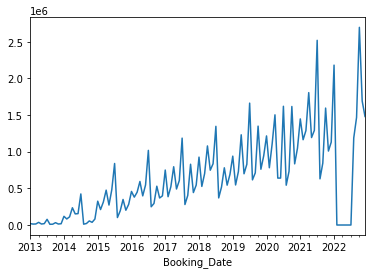

In [37]:
ts_1.plot()

In [38]:
import statsmodels.api as sm

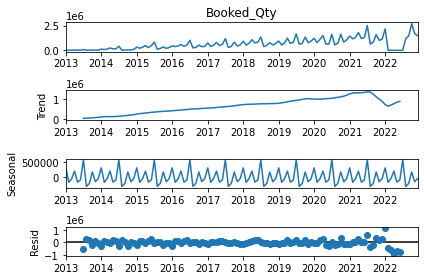

In [39]:
decomposition = sm.tsa.seasonal_decompose(ts_1, model='additive')
fig = decomposition.plot()
plt.show()

# Adfuller test

In [40]:
from statsmodels.tsa.stattools import adfuller

In [41]:
adftest = adfuller(ts_1)

In [42]:
print('pvalue of adfuller test is: ', adftest[1])

pvalue of adfuller test is:  0.48206331678127334


In [43]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

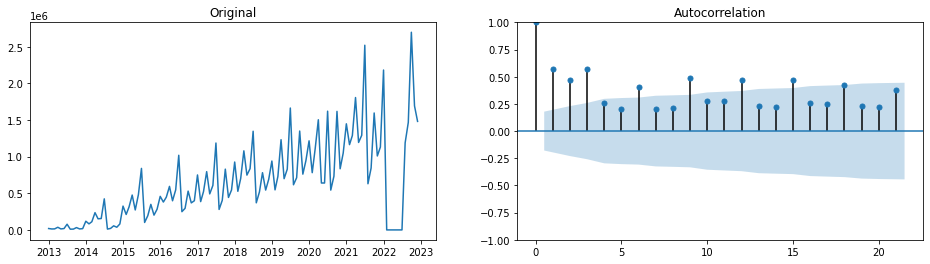

In [44]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(16,4))

ax1.plot(ts_1)
ax1.set_title("Original")

plot_acf(ts_1, ax=ax2);

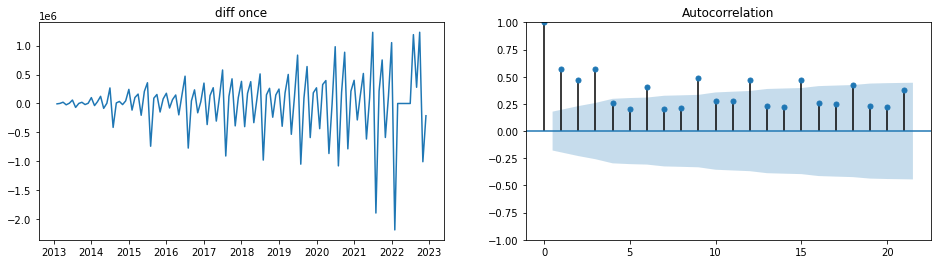

In [45]:
diff = ts_1.diff().dropna()
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(16,4))

ax1.plot(diff)
ax1.set_title("diff once")

plot_acf(ts_1, ax=ax2);

In [46]:
from pmdarima.arima.utils import ndiffs

In [47]:
ndiffs(ts_1, test='adf')

0

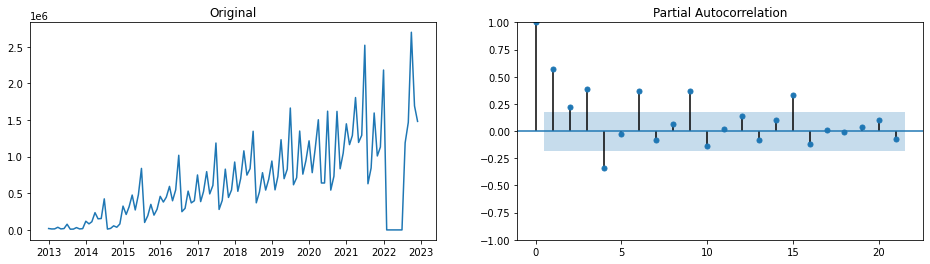

In [48]:
diff = ts_1.dropna()
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(16,4))

ax1.plot(ts_1)
ax1.set_title("Original")

plot_pacf(ts_1, ax=ax2);

In [49]:
1, 2, 3, 6,9, 15

(1, 2, 3, 6, 9, 15)

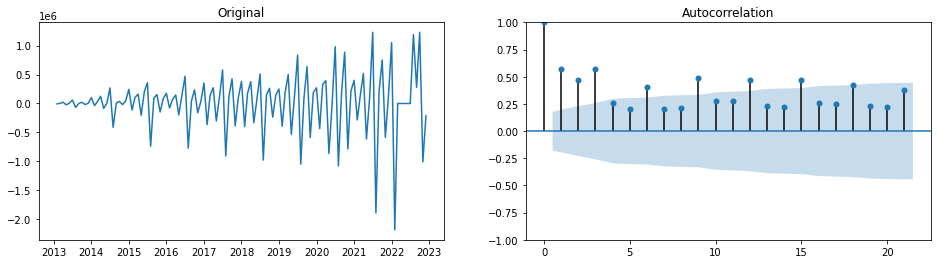

In [50]:
diff = ts_1.diff().dropna()
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(16,4))

ax1.plot(diff)
ax1.set_title("Original")

plot_acf(ts_1, ax=ax2);

In [51]:
1,2,3,4

(1, 2, 3, 4)

In [52]:
train = ts_1[:84] 
test = ts_1[84:]

In [53]:
import itertools

In [54]:
p = 15
q = range(0,10)
d = range(0,2)

In [55]:
pdq_combination = list(itertools.product(d,q))

In [56]:
from statsmodels.tsa.arima.model import ARIMA

In [57]:
from sklearn.metrics import mean_squared_error

In [58]:
order1 = []
rsme = []

In [59]:
import warnings
warnings.filterwarnings('ignore')

In [60]:
for pdq in pdq_combination:
  model = ARIMA(train,order=(15,pdq[0],pdq[1])).fit()
  pred = model.predict(start=len(train),end=len(ts_1)-1)
  error = np.sqrt(mean_squared_error(test,pred))
  order1.append(pdq)
  rsme.append(error)

In [61]:
results = pd.DataFrame(index=order1, data=rsme, columns=["RSME"])

In [62]:
results.to_csv("ARIMA_result.csv")

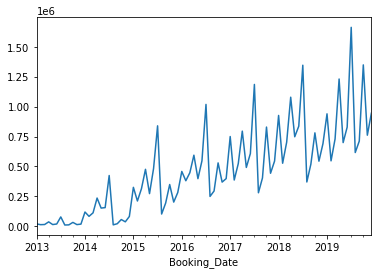

In [63]:
train.plot()

In [64]:
model = ARIMA(train, order = (15,0,8)).fit()

In [65]:
pred = model.predict(start=len(train),end=len(ts_1)-1)

In [66]:
error = np.sqrt(mean_squared_error(test,pred))
error

602283.9449884517

In [67]:
test.mean(), np.sqrt(test.var())

(1080790.5833333333, 689147.6779171864)

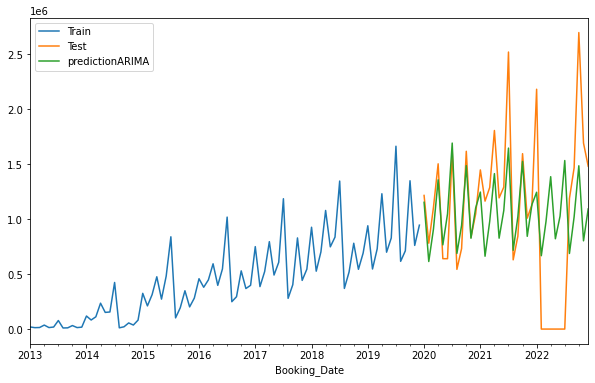

In [68]:
train.plot(legend=True, label='Train', figsize=(10,6))
test.plot(legend=True, label='Test')
pred.plot(legend=True, label='predictionARIMA');

In [69]:
final_model = ARIMA(ts_1, order = (15, 0, 8)).fit()

In [70]:
prediction = final_model.predict(len(ts_1), len(ts_1)+12)

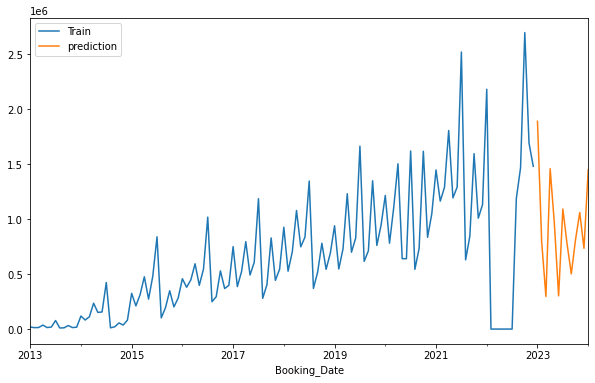

In [71]:
ts_1.plot(legend=True, label='Train',figsize=(10,6))
prediction.plot(legend=True,label='prediction');

In [72]:
prediction

2023-01-01    1.890138e+06
2023-02-01    7.908176e+05
2023-03-01    2.963886e+05
2023-04-01    1.458904e+06
2023-05-01    9.588292e+05
2023-06-01    3.022124e+05
2023-07-01    1.092265e+06
2023-08-01    7.753481e+05
2023-09-01    5.016448e+05
2023-10-01    8.124715e+05
2023-11-01    1.060359e+06
2023-12-01    7.342538e+05
2024-01-01    1.449410e+06
Freq: MS, Name: predicted_mean, dtype: float64